In [157]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss


In [93]:
Data = pd.read_csv(r"C:\Users\leora\OneDrive\Documentos\Profesional\Semestre 7\Bloque 1\ML\Entrega2\6 class csv.csv")

### Visualización del dataset

In [94]:
Data.head(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
5,2840,0.000650,0.1100,16.98,0,Red,M
6,2637,0.000730,0.1270,17.22,0,Red,M
7,2600,0.000400,0.0960,17.40,0,Red,M
8,2650,0.000690,0.1100,17.45,0,Red,M
9,2700,0.000180,0.1300,16.05,0,Red,M


### Información del dataset:



In [95]:
# star class:  Star Type
#     0     :  Brown Dwarf
#     1     :  Red Dwarf
#     2     :  White Dwarf
#     3     :  Main-Sequence
#     4     :  Supergiant
#     5     :  Hypergiant

In [96]:
Dict = {}
Key = ['Brown dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant', 'Hypergiant']
Val = [0,1,2,3,4,5]
for i in Val:
    Dict[Key[i]] = len(Data.loc[Data['Star type'] == i])

Stars = pd.DataFrame(list(Dict.items()), columns=['Star Type', 'Count'])
print('El número total de cada tipo de estrella es: ')
Stars.head()

El número total de cada tipo de estrella es: 


,Star Type,Count
0,Brown dwarf,40
1,Red Dwarf,40
2,White Dwarf,40
3,Main Sequence,40
4,Supergiant,40


Separamos el dataset en el target (variable a predecir) y los features a utilizar para clasificar cada cuerpo estelar. En features únicamente utilizaremos las numéricas y quitamos las categóricas como **Star typer**, **Star color** y **Spectral Color**:

In [97]:
x = np.array(Data.drop(['Star type', 'Star color','Spectral Class'],1))   # Excludes Star type, Star color and Spectral Class
y = np.array(Data['Star type'], dtype ='float')                           # Only Star type column
#y.shape = (len(y),1)      

C:\Users\leora\AppData\Local\Temp\ipykernel_53212\3638077669.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(Data.drop(['Star type', 'Star color','Spectral Class'],1))   # Excludes Star type, Star color and Spectral Class


### Aplicamos el Modelo 1 de Regresión Logística: Model_MLR

In [272]:

# Dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba. La proporción de división se realizó de testing = 20% y training =80%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Creamos el modelo de Regresión Logística Multiclase
Model_MLR = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=1000, random_state=42)

# Entranamos al modelo con el conjunto de datos de entrenamiento
Model_MLR.fit(X_train_scaled, y_train)

# Ponemos a prueba el modelo al hacer predicciones con base al conjunto de datos de prueba 
y_pred = Model_MLR.predict(X_test_scaled)

# Calculamos la precisión (accuracy) del modelo
accuracy = accuracy_score(y_test, y_pred)

# Imprime la precisión del modelo
print(f'Precisión del modelo de Regresión Logística Multiclase: {accuracy:.2f}')
y_prob = Model_MLR.predict_proba(X_test)
logloss = log_loss(y_test, y_prob)
logloss

Precisión del modelo de Regresión Logística Multiclase: 0.96


25.53092115062465

En el código anterior, al momento de aplicar el primer modelo tuvimos que buscar algunos hiperparámetros que empeoraran el rendimiento del modelo (recuerda ue estamos midiendo el rendimiento del modelo según la métrica accuracy_score). Esto generalmente no se hace pues siempre lo que buscamos es mejorar el rendimiento del modelo al encontrar una combinación óptima de hiperparámetros, sin embargo, en este caso tuvimos que empeorar esas combinación de hiperparámetros debido a la naturaleza del dataset que estamos utilizando. Al ser un data set perfectamente balanceado y al considerar algunas otras características subyacentes al data como la relación entre los features para la clasificación de las estrellas, nuestro modelo obtuvo una muy muy buena predicción desde que lo aplicamos. 

### Visualización y análisis de Bias y Variance para Underfitting y Overfitting

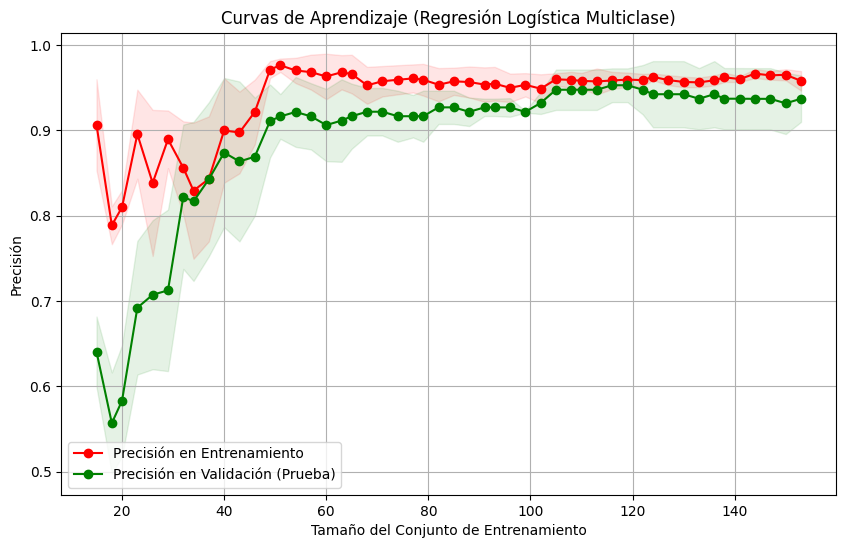

In [273]:
# Definir tamaños de entrenamiento para las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    Model_MLR, X_train_scaled, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 50))

# Calculamos la media y la desviación estándar de las puntuaciones para las curvas de aprendizaje
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Visualizamos las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.title("Curvas de Aprendizaje (Regresión Logística Multiclase)")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Precisión")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Precisión en Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Precisión en Validación (Prueba)")

plt.legend(loc="best")
plt.show()

c:\Users\leora\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


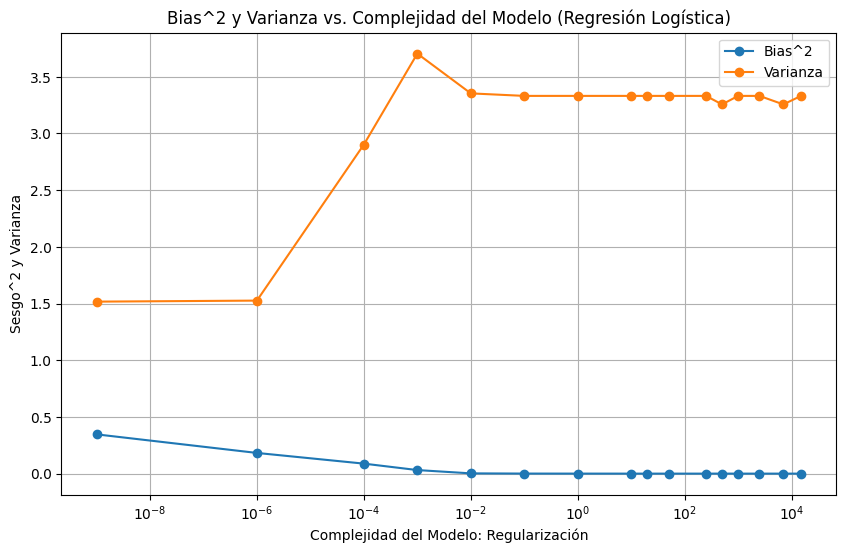

In [271]:

# Definir una lista de valores de complejidad (por ejemplo, valores de regularización)
complexity_values = [0.000000001, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 20.0, 50.0,250.0,500.0,1000.0,2500.0,7000.0,15000.0]

# Listas para almacenar los valores de sesgo^2 y varianza
bias_squared = []
variance = []
bias_fold = []
variance_fold = []

for complexity in complexity_values:
    # Crear y entrenar un modelo de regresión logística con la complejidad dada
    model = LogisticRegression(C=complexity, max_iter=10000, multi_class='auto', solver='lbfgs')
    model.fit(X_train, y_train)
    
    # Realizar predicciones en conjuntos de entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calcular la precisión en conjuntos de entrenamiento y prueba
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Calcular sesgo^2 y varianza
    bias_squared.append((1 - train_accuracy) ** 2)
    #variance.append(np.var(y_test_pred != y_test))
    variance.append(np.var(y_test_pred))

    bias_fold.append((np.mean(y_test_pred == y_test) - np.mean(y_test))**2)  # Eleva al cuadrado el sesgo
    variance_fold.append(np.var(y_test_pred == y_test))

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.title("Bias^2 y Varianza vs. Complejidad del Modelo (Regresión Logística)")
plt.xlabel("Complejidad del Modelo: Regularización")
plt.ylabel("Sesgo^2 y Varianza")
plt.grid()

plt.plot(complexity_values, bias_squared, 'o-', label="Bias^2")
plt.plot(complexity_values, variance, 'o-', label="Varianza")
#plt.plot(complexity_values, bias_fold, 'o-', label="Bias^2")
#plt.plot(complexity_values, variance_fold, 'o-', label="Varianza")

plt.legend(loc="best")
plt.xscale('log')
plt.show()

### Regularización: Mejora de hiperparámetros

Ahora aplicamos un gridsearch para encontrar la mejor combinación de hiperparámetros. 

Hay restricciones (regularizaciones) que no funcionan con todos los solvers

In [274]:

# Define los hiperparámetros y sus valores que deseas explorar
param_grid = {
    'penalty': ['l2'],  # Tipo de regularización (L1 o L2)
    'C': [0.001,0.01,0.1, 1, 10, 100],  # Parámetro de regularización C
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Algoritmo de optimización
    'max_iter': [1000,1500, 2000, 5000]  # Número máximo de iteraciones
}

# Crea una instancia de GridSearchCV
grid_search = GridSearchCV(Model_MLR, param_grid, cv=5, scoring='accuracy')

# Ajusta el modelo a tus datos de entrenamiento
grid_search.fit(X_train_scaled, y_train)

# Obtiene la mejor combinación de hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

c:\Users\leora\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\leora\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\leora\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\leora\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\leora\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

In [275]:
best_params

{'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}

In [276]:
best_model

LogisticRegression(C=100, max_iter=1000, random_state=42)

### Modelo de Regresión Logística con hiperparámetros optimizados

In [102]:
Model_MLR_2 = LogisticRegression(multi_class='auto', C=100, penalty= 'l2', solver='lbfgs', max_iter=1500, random_state=42)

# Entranamos al modelo con el conjunto de datos de entrenamiento
Model_MLR_2.fit(X_train_scaled, y_train)

# Ponemos a prueba el modelo al hacer predicciones con base al conjunto de datos de prueba 
y_pred = Model_MLR_2.predict(X_test_scaled)

# Calculamos la precisión (accuracy) del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo de Regresión Logística Multiclase: {accuracy:.2f}')

Precisión del modelo de Regresión Logística Multiclase: 0.98


In [104]:
scores = cross_val_score(Model_MLR_2, X_test_scaled, y_test, cv=5, scoring='accuracy')
scores

array([1. , 0.8, 1. , 1. , 1. ])

In [105]:
print("Puntuaciones de validación cruzada:", scores)
print("Precisión media:", scores.mean())
print("Desviación estándar de la precisión:", scores.std())

Puntuaciones de validación cruzada: [1.  0.8 1.  1.  1. ]
Precisión media: 0.96
Desviación estándar de la precisión: 0.07999999999999999


In [106]:
Data2 = pd.DataFrame({'Valores de Prueba': y_test.tolist(), 'Valores de Predicción': y_pred.tolist()})

star_mapping = {
    0: 'Brown Dwarf',
    1: 'Red Dwarf',
    2: 'White Dwarf',
    3: 'Main Sequence',
    4: 'Supergiant',
    5: 'Hypergiant'
}
# Agregamos una nueva columna según el tipo de predicción con el nombre de la estrella predicha
Data2['Predicción: Tipo de estrella'] = Data2['Valores de Predicción'].map(star_mapping)

#Agregamos una nueva columna para saber si el valor predicho (y_test) concuerda con el verdadero de prueba (y_test) 
Data2['¿Es correcta la predicción?'] = (Data2['Valores de Prueba'] == Data2['Valores de Predicción']) #Pasamos el valor booleano a numérico para obtener el promedio
Data2.head(10)

,Valores de Prueba,Valores de Predicción,Predicción: Tipo de estrella,¿Es correcta la predicción?
0,2.0,2.0,White Dwarf,True
1,0.0,0.0,Brown Dwarf,True
2,3.0,3.0,Main Sequence,True
3,4.0,4.0,Supergiant,True
4,4.0,4.0,Supergiant,True
5,5.0,5.0,Hypergiant,True
6,5.0,5.0,Hypergiant,True
7,2.0,2.0,White Dwarf,True
8,0.0,0.0,Brown Dwarf,True
9,2.0,2.0,White Dwarf,True


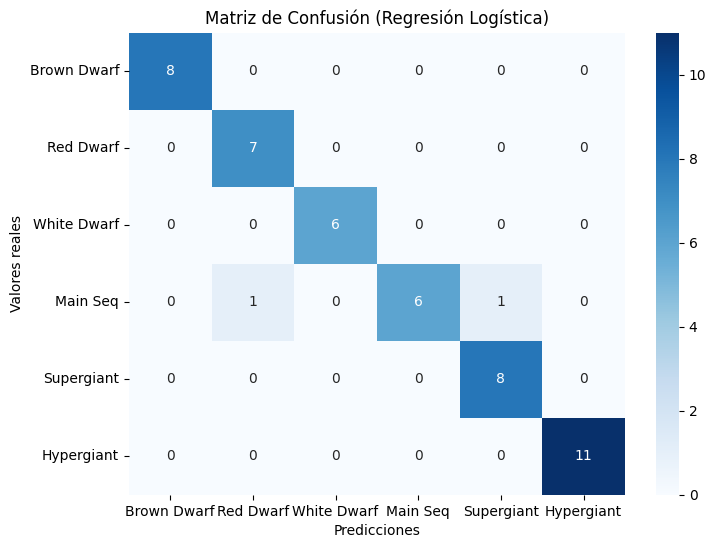

In [286]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Seq', 'Supergiant', 'Hypergiant'], yticklabels=[ 'Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Seq', 'Supergiant', 'Hypergiant'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión (Regresión Logística)')
plt.show()

Pon bien en la matriz de confusión las clases y haz una tabla de los resultados que te está arrojando el modelo. En y_pred dice que es 0 entonces es una white dwarf y asi

Obtenemos el reporte de clasificación: 

In [109]:
nombres_clases = Data['Star type'].unique()
reporte = classification_report(y_test, y_pred, target_names=list(star_mapping.values()), output_dict= True)
df_reporte = pd.DataFrame(reporte).transpose()
df_reporte.rename(index=star_mapping, inplace=True)
df_reporte

,precision,recall,f1-score,support
Brown Dwarf,1.000000,1.000000,1.000000,8.000000
Red Dwarf,1.000000,1.000000,1.000000,7.000000
White Dwarf,1.000000,1.000000,1.000000,6.000000
Main Sequence,1.000000,0.875000,0.933333,8.000000
Supergiant,0.888889,1.000000,0.941176,8.000000
Hypergiant,1.000000,1.000000,1.000000,11.000000
accuracy,0.979167,0.979167,0.979167,0.979167
macro avg,0.981481,0.979167,0.979085,48.000000
weighted avg,0.981481,0.979167,0.979085,48.000000


Utilizamos el learnig_curve para representar visualmente el rendimiento del modelo a medida que aumenta el tamaño del conjunto de entrenamiento

We evaluate quantitatively overfitting / underfitting by using cross-validation. We calculate the mean squared error (MSE) on the validation set, the higher, the less likely the model generalizes correctly from the training data.

In [183]:
Data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


### Modelo 2: Random Forest

In [251]:
from sklearn.ensemble import RandomForestClassifier
X_rf = Data[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']]
y_rf = Data['Star type']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train1_scaled = sc.fit_transform(X_train1)
X_test1_scaled = sc.transform(X_test1)
rf_model = RandomForestClassifier(n_estimators=1, max_depth=2, criterion='entropy', random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
rf_model.fit(X_train1_scaled, y_train1)

y_pred_rf = rf_model.predict(X_test1_scaled)

# Calcular la precisión del modelo
accuracy_rf = accuracy_score(y_test1, y_pred_rf)
print("Precisión del modelo:", accuracy_rf)

# Mostrar el informe de clasificación (incluyendo precisión, recuperación y puntuación F1)
print("Informe de clasificación:")
print(classification_report(y_test1, y_pred_rf))

# Mostrar la matriz de confusión
confusion = confusion_matrix(y_test1, y_pred_rf)
print("Matriz de confusión:")
print(confusion)


Precisión del modelo: 0.6041666666666666
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.53      1.00      0.70         8
           1       0.00      0.00      0.00         7
           2       1.00      1.00      1.00         6
           3       0.89      1.00      0.94         8
           4       0.39      0.88      0.54         8
           5       0.00      0.00      0.00        11

    accuracy                           0.60        48
   macro avg       0.47      0.65      0.53        48
weighted avg       0.43      0.60      0.49        48

Matriz de confusión:
[[ 8  0  0  0  0  0]
 [ 7  0  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  1  7  0]
 [ 0  0  0  0 11  0]]


c:\Users\leora\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\leora\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\leora\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

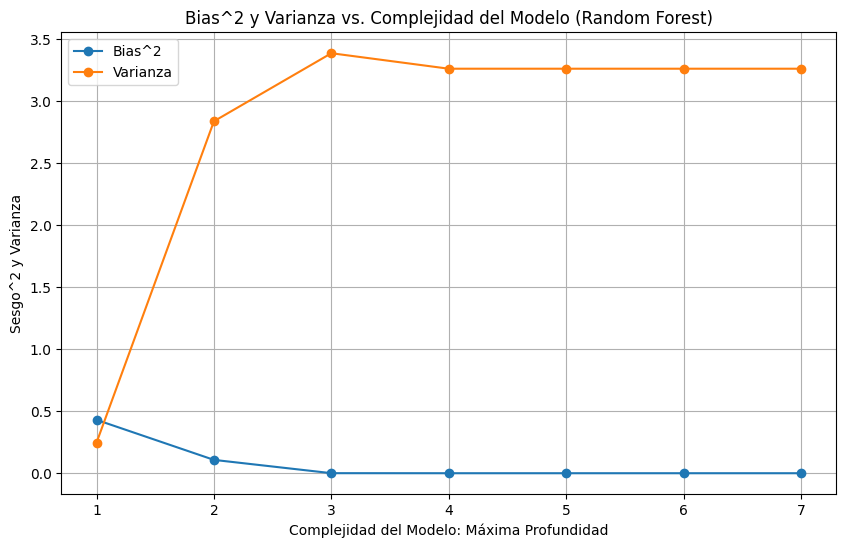

In [264]:

# Definir una lista de valores de complejidad (por ejemplo, valores de regularización)
estimators_values = [1,2,3,4,5,6,7]

# Listas para almacenar los valores de sesgo^2 y varianza
bias_squared = []
variance = []
bias_fold = []
variance_fold = []

for complexity in estimators_values:
    # Crear y entrenar un modelo de regresión logística con la complejidad dada
    rf_model1 = RandomForestClassifier(n_estimators=1, max_depth=complexity, criterion='entropy', random_state=42)
    rf_model1.fit(X_train1_scaled, y_train1)
    
    # Realizar predicciones en conjuntos de entrenamiento y prueba
    y_train_pred = rf_model1.predict(X_train1_scaled)
    y_test_pred = rf_model1.predict(X_test1_scaled)
    
    # Calcular la precisión en conjuntos de entrenamiento y prueba
    train_accuracy = accuracy_score(y_train1, y_train_pred)
    test_accuracy = accuracy_score(y_test1, y_test_pred)
    
    # Calcular sesgo^2 y varianza
    bias_squared.append((1 - train_accuracy) ** 2)
    #variance.append(np.var(y_test_pred != y_test1))
    variance.append(np.var(y_test_pred))

    bias_fold.append((np.mean(y_test_pred == y_test1) - np.mean(y_test1))**2)  # Eleva al cuadrado el sesgo
    variance_fold.append(np.mean(np.mean(y_test_pred == y_test1) - np.mean(y_test1)))

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.title("Bias^2 y Varianza vs. Complejidad del Modelo (Random Forest)")
plt.xlabel("Complejidad del Modelo: Máxima Profundidad")
plt.ylabel("Sesgo^2 y Varianza")
plt.grid()

plt.plot(estimators_values, bias_squared, 'o-', label="Bias^2")
plt.plot(estimators_values, variance, 'o-', label="Varianza")
#plt.plot(estimators_values, bias_fold, 'o-', label="Bias^2")
#plt.plot(estimators_values, variance_fold, 'o-', label="Varianza")

plt.legend(loc="best")
#plt.xscale('log')
plt.show()

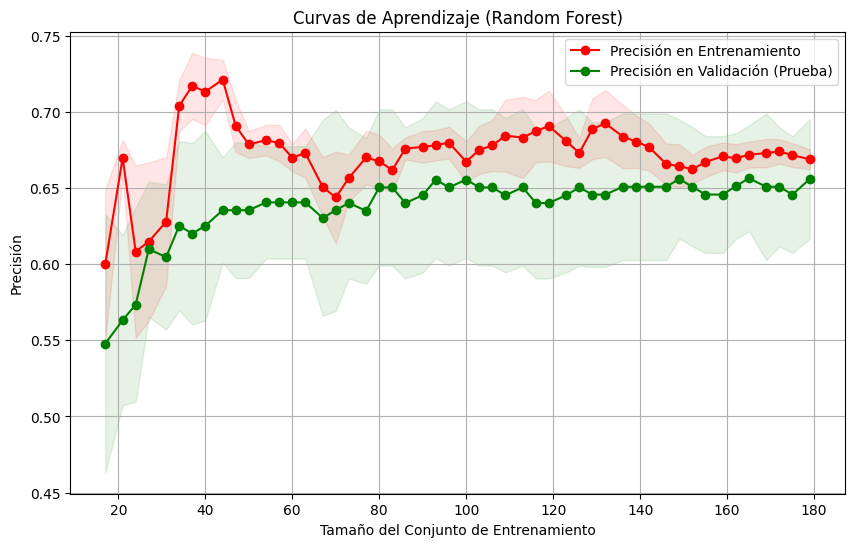

In [252]:
# Definir tamaños de entrenamiento para las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train1_scaled, y_train1, cv=15, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 50))

# Calculamos la media y la desviación estándar de las puntuaciones para las curvas de aprendizaje
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Visualizamos las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.title("Curvas de Aprendizaje (Random Forest)")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Precisión")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Precisión en Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Precisión en Validación (Prueba)")

plt.legend(loc="best")
plt.show()

### Mejora de hiperparámetros

In [278]:
# Define los hiperparámetros y sus valores que deseas explorar
param_grid = {
    'n_estimators': [1, 2, 3],  # Número de árboles en el bosque
    'max_depth': [None, 1, 3, 5],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas en un nodo hoja
}

# Crea una instancia de GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Ajusta el modelo a tus datos de entrenamiento
grid_search.fit(X_train1_scaled, y_train1)

# Obtiene la mejor combinación de hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [279]:
best_params

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1}

In [280]:
best_model

RandomForestClassifier(criterion='entropy', n_estimators=1, random_state=42)

Veamos el rendimiento del modelo optimizado:

In [281]:
rf_model1 = RandomForestClassifier(n_estimators=1, max_depth=None, criterion='entropy', random_state=42, min_samples_leaf=1, min_samples_split=2)

# Entrenar el modelo en el conjunto de entrenamiento
rf_model1.fit(X_train1_scaled, y_train1)

y_pred_rf = rf_model1.predict(X_test1_scaled)

# Calcular la precisión del modelo
accuracy_rf = accuracy_score(y_test1, y_pred_rf)
print("Precisión del modelo:", accuracy_rf)


Precisión del modelo: 0.9583333333333334


In [283]:
scores = cross_val_score(rf_model1, X_test1_scaled, y_test1, cv=5, scoring='accuracy')
print("Puntuaciones de validación cruzada:", scores)
print("Precisión media:", scores.mean())
print("Desviación estándar de la precisión:", scores.std())

Puntuaciones de validación cruzada: [1.         0.8        1.         1.         0.88888889]
Precisión media: 0.9377777777777776
Desviación estándar de la precisión: 0.0812251861444314


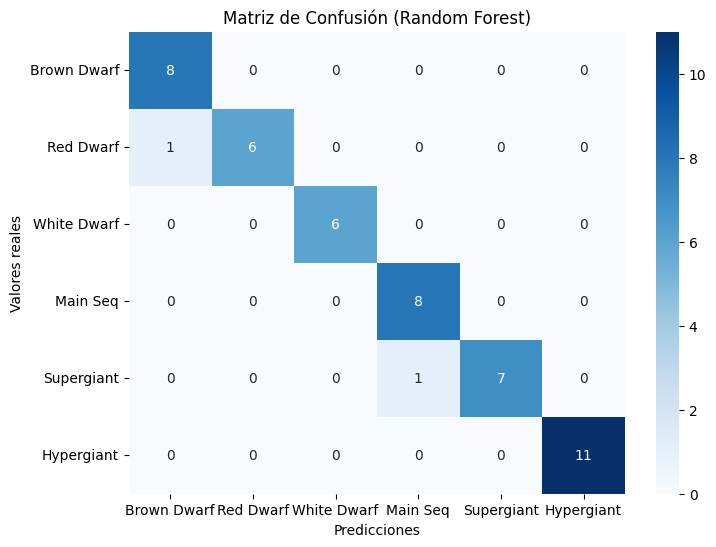

In [287]:
confusion = confusion_matrix(y_test1, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Seq', 'Supergiant', 'Hypergiant'], yticklabels=[ 'Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Seq', 'Supergiant', 'Hypergiant'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión (Random Forest)')
plt.show()